# Classification task with TensorFlow

Project Objective is to perform a classification task with TensorFlow. We will also identify and deal with overfitting through early Stopping Callbacks and Dropout Layers. Dataset used is a Breast Cancer diagnostic dataset and contains 30 numeric predictive attributes and the dependant variable is a binary classification of benign or malignant.

- Early stopping in Keras automatically stop training based on a loss condition on the validation data passed during the model.fit() call
- Dropout layers is added to Layers to randomly 'turn off' neurons during training to prevent overfitting

### Libraries

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
# read dataset
df = pd.read_csv('cancer_classification.csv')

In [132]:
# check missing columns
#df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [133]:
# check statistical description of data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# EDA

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

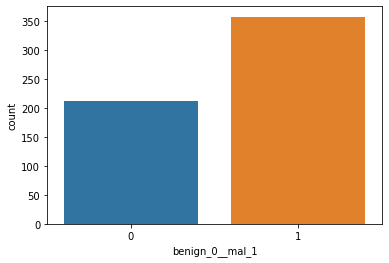

In [134]:
# OUTPUT LABEL
sns.countplot(data=df, x='benign_0__mal_1')

The difference between benign and mal is not much deifference. Therefore we will not consider using data balancing techniques

[Text(0.5, 1.0, 'Correlation of features against Target Variable')]

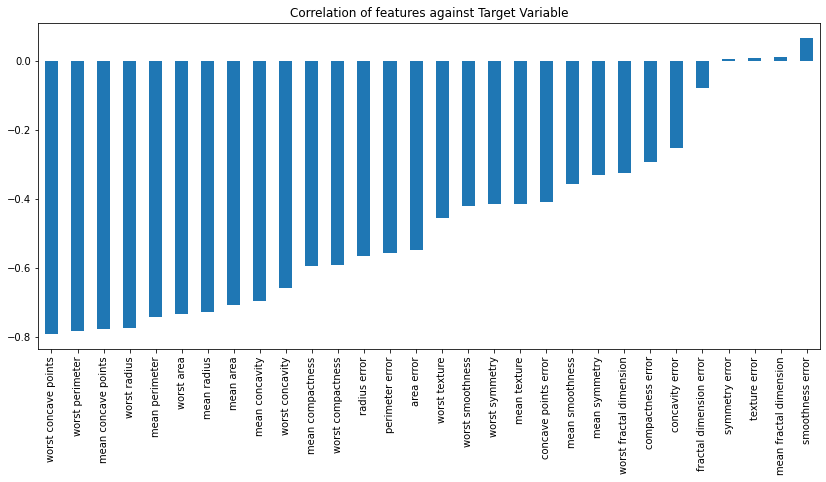

In [135]:
# check correlation of features
plt.figure(figsize=(14,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar').set(title='Correlation of features against Target Variable')

We note that mos features are negatively correlated with the dependant variable

<AxesSubplot:>

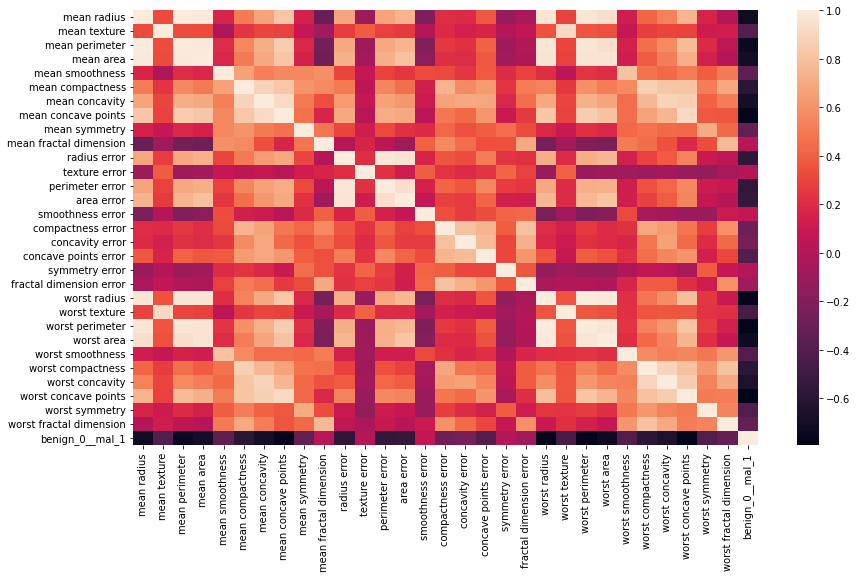

In [136]:
# can plot correlation between variables 
plt.figure(figsize=(14,8))
sns.heatmap(df.corr())

In [138]:
# view dataset
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Preprocessing

In [139]:
# split the model into X, and y
# Add values method to convert pd dataframe to an array
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [140]:
# create a train test split
from sklearn.model_selection import train_test_split

seed = 7000
X_train, X_test,y_train, y_test =  train_test_split(X,y, test_size = 0.25, random_state = seed)

In [141]:
from sklearn.preprocessing import MinMaxScaler

# create an instance of a scaling
scaler = MinMaxScaler()

# scale the X_train
X_train = scaler.fit_transform(X_train)

# scale the X_test
X_test = scaler.transform(X_test)

In [142]:
X_train.shape

(426, 30)

# Model

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# create a sequential model
model = Sequential()

# create dense layers
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# output layer
# binary classification
model.add(Dense(1, activation='sigmoid'))

# loss score should be suitable for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam')

In [144]:
# train the model
model.fit(x=X_train, y= y_train,
          epochs = 600,  # epochs is large and results in overfitting
          validation_data = (X_test, y_test),
          verbose=0
         )

# Evaluation of the model

In [145]:
# explore model history of losses (binary_crossentropy)
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.674312,0.670611
1,0.643140,0.629353
2,0.609844,0.593855
3,0.569498,0.547377
4,0.513223,0.486539


<AxesSubplot:>

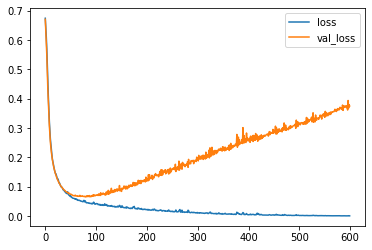

In [146]:
# plot the losses
losses.plot()

- The plot shows that during the first couple of epochs, training and validation loss are both decreasing. This shows that we have not yet overfit our training data.
- After some more epochs, our training loss continues to go down but however our validation loss is now increasing. This shows that we are overfitting to our training data.
- This means that we are training for too many epochs. To avoid overfitting on our training data, we need to use *early stopping using Tensorflow Keras Callbacks*

# Rebuild Model with Early Stopping applied

In [147]:
# create a sequential model
model = Sequential()

# create dense layers
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# output layer
# binary classification
model.add(Dense(1, activation='sigmoid'))

# loss score should be suitable for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam')

In [148]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min',  # mode is set to min becz we want to minimise val_loss, for accuracy we use max
                          verbose = 1,  # report results
                          patience = 25 # we wait for 25 epochs after we have detected a stopping point bcz of noise
                          )


In [149]:
# train the new model
model.fit(x=X_train, y= y_train,
          epochs = 600,  # epochs is large and results in overfitting
          validation_data = (X_test, y_test),
          verbose=0,
          callbacks = [early_stop] # apply early stopping defined earlier, pass it as a list
         )

Epoch 104: early stopping


The model attempt to run on 600 epochs, but early stopping is detected at 90

In [150]:
# explore model history of losses (binary_crossentropy)
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,0.677345,0.666333
1,0.660606,0.650835
2,0.645724,0.634296
3,0.628328,0.614442
4,0.608023,0.592367


<AxesSubplot:>

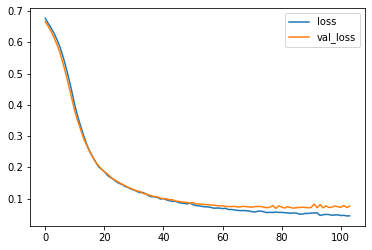

In [151]:
model_loss.plot()

## Adding Drop Out layers to our model

- We can also reduce overfitting furthermore by adding Drop Out layers. 
- Dropout layers essentially turn off a certain percentage of neurons randomly
- Droput layers are added after each dense layer is defined
- The main parameter for Dropout is rate, which is the probability that you will randomly turn off the neurons during training

In [152]:
from tensorflow.keras.layers import Dropout

# create a sequential model
model = Sequential()

# create dense layers
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) # common value for rate is 0.5. Half of the neurons will be turned off randomly

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5)) # random subselection of neurons are turned off

# output layer 
model.add(Dense(1, activation='sigmoid')) # set to sigmoid for binary classification

# loss score should be suitable for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam')


In [153]:
# train the new model
model.fit(x=X_train, y= y_train,
          epochs = 600,  # epochs is large and results in overfitting
          validation_data = (X_test, y_test),
          verbose=0,
          callbacks = [early_stop] # apply early stopping defined earlier, pass it as a list
         )

Epoch 108: early stopping


Early stopping was detected at 135 epochs

In [154]:
# explore model history of losses (binary_crossentropy)
model3_loss = pd.DataFrame(model.history.history)
model3_loss.head()

,loss,val_loss
0,0.712372,0.669037
1,0.678613,0.649404
2,0.661181,0.627929
3,0.632028,0.598615
4,0.606047,0.570587


<AxesSubplot:>

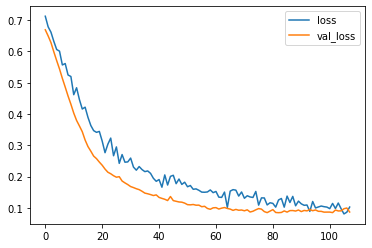

In [155]:
model3_loss.plot()

# Evaluation Metrics

In [156]:
# predictions
predictions = model.predict(X_test)

# convert to binary
predictions_binary = (predictions > 0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


In [157]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [158]:
print(classification_report(y_test, predictions_binary))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        61
           1       0.96      0.98      0.97        82

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [159]:
print(confusion_matrix(y_test, predictions_binary))

[[58  3]
 [ 2 80]]


In [160]:
print(roc_auc_score(y_test, predictions_binary))

0.9632147141143542


## Conclusion

- Results of the model are impressive. Only a few variables were misclassified. Precision and are both above 95%. 
- Since our dataset is not imbalanced, we can consider Accouracy score as an evaluation metric for our model. Accuracy score for the model is 97%
- The model also has a good score on roc auc which show model's classification performance at 0.969. The ROC AUC is a useful metric for evaluating classification models because it is insensitive to the class distribution and the specific classification threshold used.

